# Model Development for GPA prediction

### Reading Data

In [7]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 453.5 kB/s eta 0:00:24
   - -------------------------------------- 0.5/11.1 MB 453.5 kB/s eta 0:00:24
   - -------------------------------------- 0.5/11.1 MB 453.5 kB/s eta 0:00:24
   - -------------------------------------- 0.5/11.1 MB 453.5 kB/s eta 0:00:24
   -- ------------------------------------- 0.8/11.1 MB 399.3 kB/s eta 0:00:26
   -- ------------------------------------- 0.8/11.1 MB 399.3 kB/s eta 0:00:26
   -- ---------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd

In [19]:
df = pd.read_csv(r'E:\6th Semester\Machine Learning\Lab\Assignment No. 04\student_lifestyle_dataset.csv')
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [20]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [21]:
# Renaming the columns for simplicity
df = df.rename(columns={
    'Study_Hours_Per_Day': 'study_hours',
    'Sleep_Hours_Per_Day': 'sleep_hours',
    'Social_Hours_Per_Day': 'social_hours',
    'Physical_Activity_Hours_Per_Day': 'physical_hours',
    'GPA': 'gpa'
})

In [22]:
# Droping irrelevant columns
df = df.drop(columns=['Student_ID', 'Extracurricular_Hours_Per_Day', 'Stress_Level'])


In [23]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 study_hours       0
sleep_hours       0
social_hours      0
physical_hours    0
gpa               0
dtype: int64


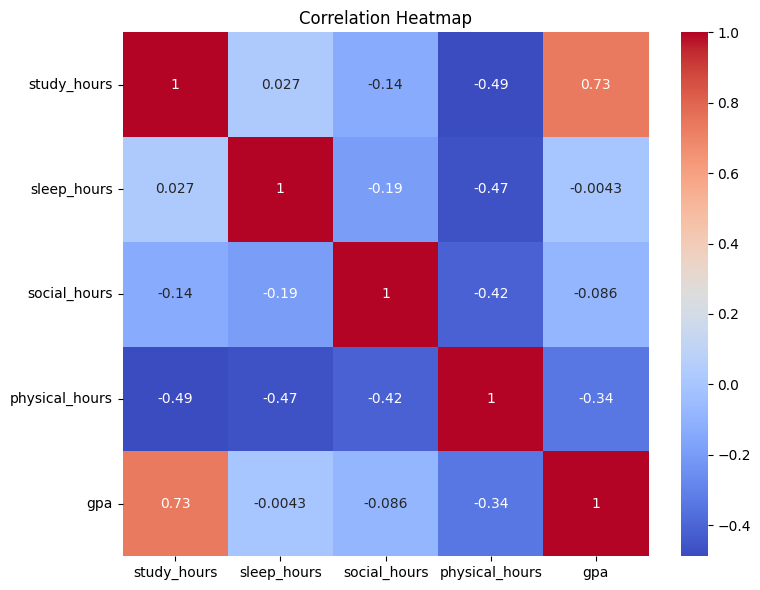

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

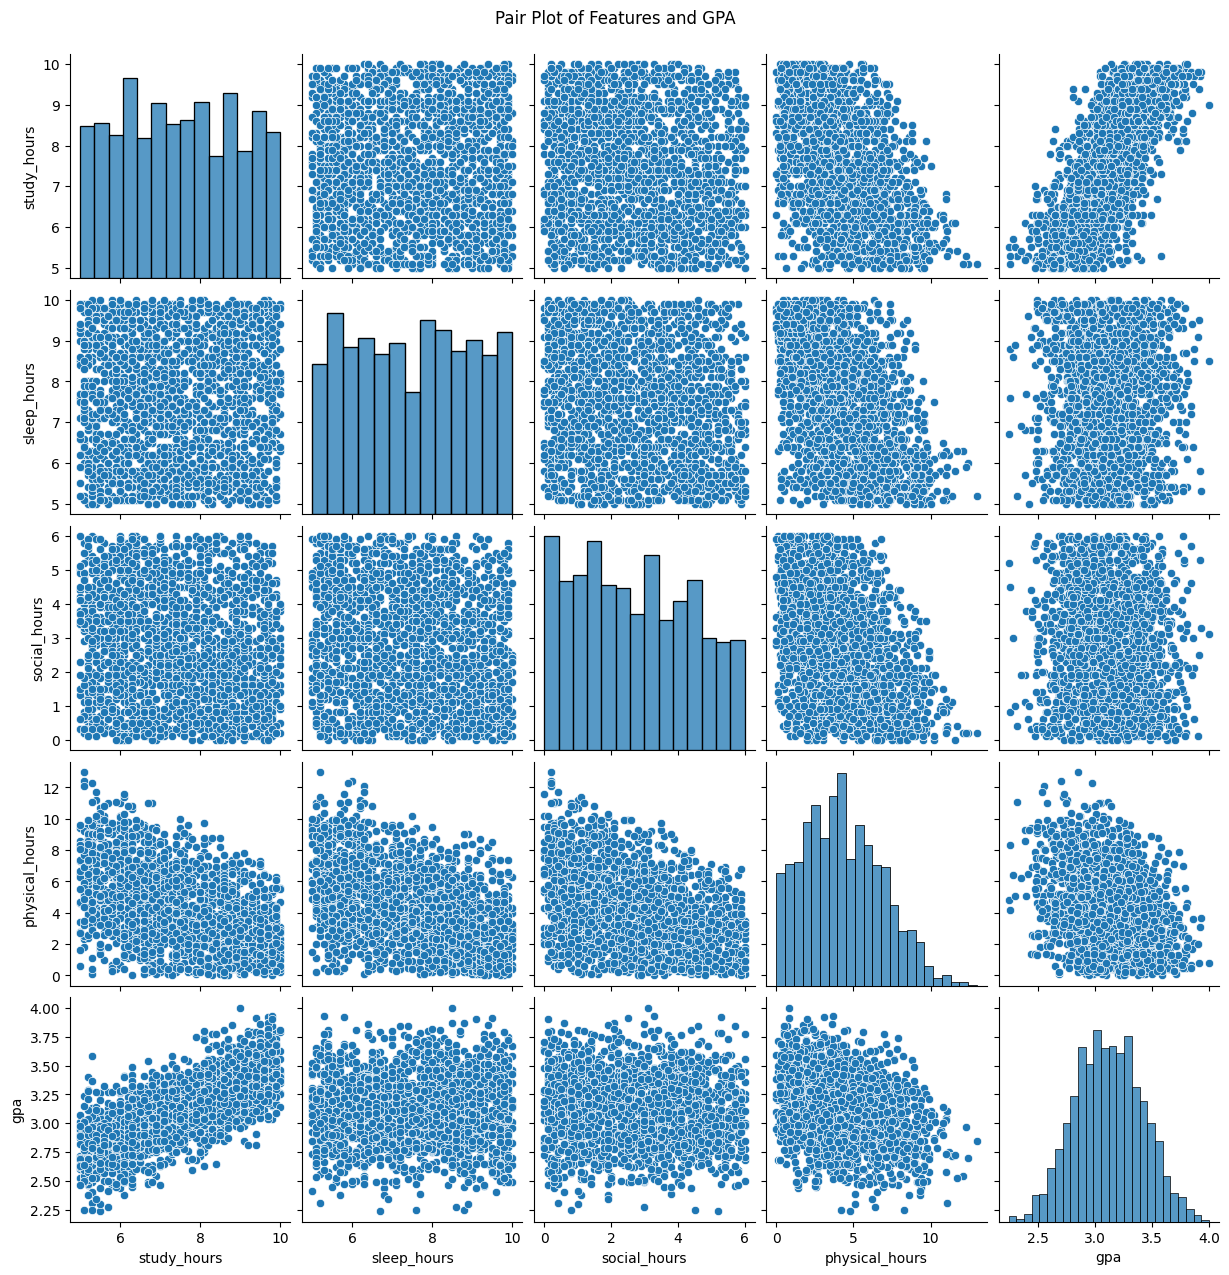

In [25]:
# Pairploting to view distributions and relationships
sns.pairplot(df)
plt.suptitle("Pair Plot of Features and GPA", y=1.02)
plt.show()

## Model Training and Evaluatioon

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features and target
X = df[['study_hours', 'sleep_hours', 'social_hours', 'physical_hours']]
y = df['gpa']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Evaluation Metrics:
R² Score: 0.5495
Mean Absolute Error (MAE): 0.1639
Mean Squared Error (MSE): 0.0421
Root Mean Squared Error (RMSE): 0.2051


## Saving our model

In [31]:
import pickle

# Save model to file
with open("gpa_predictor_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as 'gpa_predictor_model.pkl'")


Model saved as 'gpa_predictor_model.pkl'


# Interface Development

## Backend Code (using Flask)

In [32]:
pip install flask


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
with open('gpa_predictor_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [34]:
from flask import Flask, render_template, request
import pickle
import numpy as np

app = Flask(__name__)

# Load the trained model
with open('gpa_predictor_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the input features from the form
        study_hours = float(request.form['study_hours'])
        sleep_hours = float(request.form['sleep_hours'])
        social_hours = float(request.form['social_hours'])
        physical_hours = float(request.form['physical_hours'])



        # Prepare the input as a numpy array
        input_data = np.array([[study_hours, sleep_hours, social_hours, physical_hours]])  # Adjust the features list as needed

        # Make the prediction
        prediction = model.predict(input_data)
        predicted_gpa = prediction[0]

        return render_template('index.html', prediction_text=f"Predicted GPA: {predicted_gpa:.2f}")

    except Exception as e:
        return render_template('index.html', prediction_text=f"Error: {str(e)}")

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
